<a href="https://colab.research.google.com/github/poovarasansivakumar2003/Marvel_Batch_4_works/blob/main/Task_6_Image_Classification_using_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Image Classification using KMeans Clustering**
KMeans Clustering is an unsupervised machine learning algorithm used to classify data into k clusters. In image classification, KMeans can group similar images based on pixel intensity, color, or any other feature. Although KMeans isn't typically used for traditional image classification tasks like Convolutional Neural Networks (CNNs), it can be an excellent way to cluster images based on similarity when labels are unavailable.

### **Key Concepts of KMeans Clustering**
<ul>
<li>

**Clustering**: Grouping similar data points together based on features.</li>
<li>

**Centroids**: The center point of each cluster. KMeans iteratively updates centroids to minimize the distance between points and the centroid of their assigned cluster.</li>
<li>

**Iterations**: KMeans performs multiple iterations to assign each point to the nearest centroid and updates centroids based on the points in each cluster.</li>
<li>

**Convergence: The algorithm stops when the centroids no longer change significantly between iterations, or a maximum number of iterations is reached.</li>
</ul>

### **Steps to Perform KMeans Clustering on Images**
<ol>
<li>

**Load the Dataset**: The MNIST dataset (Modified National Institute of Standards and Technology) contains 70,000 images of handwritten digits (0-9), each of size 28x28 pixels.</li>
<li>

**Preprocess the Images**: Flatten the images and scale the pixel values to prepare them for clustering.</li>
<li>

**Apply KMeans Clustering**: Use the KMeans algorithm to classify images into k clusters (e.g., k=10 for digit classification).</li>
<li>

**Visualize the Clusters**: Analyze and visualize the clustering results to understand the effectiveness of the clustering.</li>
</ol>

### **Example: Image Classification using KMeans Clustering on MNIST Dataset**
Below is a Python implementation to classify MNIST images into 10 clusters using KMeans clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustering Accuracy: 0.5850285714285715


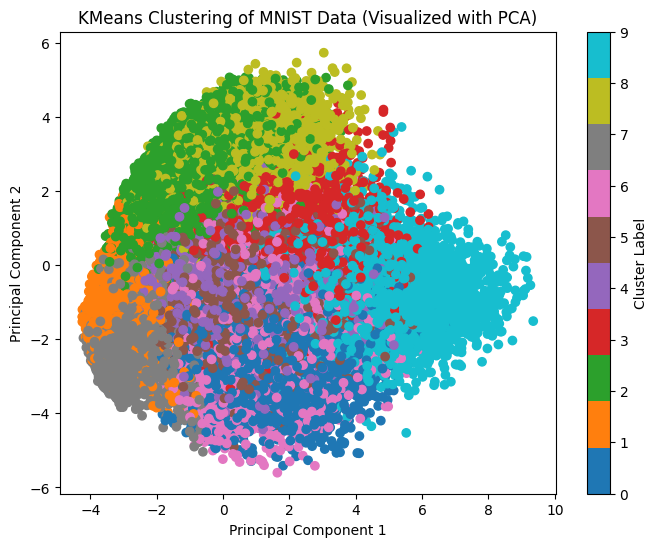

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Preprocess the data (Normalize the data)
X = X / 255.0  # Scale pixel values to range [0, 1]

# Initialize KMeans with 10 clusters (one for each digit)
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model
kmeans.fit(X)

# Predict the clusters for each image
clusters = kmeans.predict(X)

# Evaluate clustering performance
def map_clusters_to_labels(clusters, y):
    labels = np.zeros_like(clusters)
    for i in range(10):
        mask = (clusters == i)
        true_labels = y[mask]
        most_common = np.bincount(true_labels.astype(int)).argmax()
        labels[mask] = most_common
    return labels

# Map clusters to true labels
mapped_labels = map_clusters_to_labels(clusters, y)

# Evaluate clustering with accuracy
accuracy = accuracy_score(y.astype(int), mapped_labels)
print("Clustering Accuracy:", accuracy)

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10')
plt.title('KMeans Clustering of MNIST Data (Visualized with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


### Explanation:
<ol>
<li>

**Data Loading**: Fetch the MNIST dataset using `fetch_openml`.
Data Normalization: Scale pixel values to a range of [0, 1] to improve the clustering performance.</li>
<li>

**Initialize and Fit KMeans**: Initialize KMeans with `n_clusters=10` and fit it to the data. The model clusters the images into 10 groups.</li>
<li>

**Cluster Prediction**: Predict the cluster for each image.</li>
<li>

**Cluster-to-Label Mapping**: Since KMeans does not assign specific labels to clusters, we map each cluster to the most common true label within that cluster.</li>
<li>

**Clustering Accuracy**: Evaluate clustering accuracy by comparing the predicted clusters to the actual digit labels.</li>
<li>

**PCA for Visualization**: Use PCA to reduce dimensionality to 2D for visualization purposes.</li>
<li>

**Visualization**: Visualize the clusters using a scatter plot with PCA components.</li>
</ol>

### **Conclusion**
KMeans clustering can be effectively used for unsupervised image classification tasks. Though it may not reach the performance of supervised learning techniques like CNNs, it provides a quick and simple way to group images based on similarity when labeled data isn't available.